In [1]:
# This script used for Modeling (Text Classification, Sentiment Analysis, Topic Modeling) and Evaluation of Dataset

In [2]:
# 4. MODELING + Sentiment Analysis

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report
from tabulate import tabulate

In [3]:
df = pd.read_excel("Dataset/Pre-Text Processing Dataset.xlsx", sheet_name="Sheet1")

In [4]:
df.head(10)

,Branch,Customer,Time,Reviews,Cleaned_Reviews,Processed_Reviews,Sentiment
0,McDonald’s Petronas Kota Damansara DT,Hamd,3 weeks ago,Worst McDonalds Ive visited in my life.\n\nFoo...,worst macdonald give visit life food cold hard...,"['worst', 'macdonald', 'give', 'visit', 'life'...",Negative
1,McDonald’s Petronas Kota Damansara DT,Megan Ooi,3 months ago,"worst service ever, when requested for chicken...",worst servic ever request chicken part said ch...,"['worst', 'servic', 'ever', 'request', 'chicke...",Negative
2,McDonald’s Petronas Kota Damansara DT,VincentKoh LUMCFan,5 months ago,[2022-2024]\n\nAlways ALWAYS a pleasant locati...,alway alway pleasant locat enjoy train go copi...,"['alway', 'alway', 'pleasant', 'locat', 'enjoy...",Positive
3,McDonald’s Petronas Kota Damansara DT,Pang Choon Fuei,4 months ago,I done the kiosk order and pay Cash.\n\nBut em...,done risk order pay cash employe present see l...,"['done', 'risk', 'order', 'pay', 'cash', 'empl...",Negative
4,McDonald’s Petronas Kota Damansara DT,nur aein,3 months ago,"Please train your mc cafe staff, order ice ble...",pleas train cafe staff order ice blend much fo...,"['plea', 'train', 'cafe', 'staff', 'order', 'i...",Negative
5,McDonald’s Petronas Kota Damansara DT,Huck Phin Ch'ng,4 months ago,No WiFi unlike the sign,wife unlik sign,"['wife', 'unlik', 'sign']",Negative
6,McDonald’s Petronas Kota Damansara DT,Reenthiyahchandran Nitiyah,2 months ago,":\n""The cashier Watie was very friendly and gr...",cashier kati friend greet smile,"['cashier', 'kati', 'friend', 'greet', 'smile']",Positive
7,McDonald’s Petronas Kota Damansara DT,Syazwan Hilmi Shaharom,a month ago,They do not understand simple instructions and...,understand simpl instruct deliveri alway somet...,"['understand', 'simpl', 'instruct', 'deliveri'...",Negative
8,McDonald’s Petronas Kota Damansara DT,S jackey,2 months ago,"Hygienic issues, drinks with dirty objects",hygien issu drink dirti object,"['hygien', 'issu', 'drink', 'dirti', 'object']",Negative
9,McDonald’s Petronas Kota Damansara DT,刘骏利,a month ago,Staffs are very nice here.,staff nice,"['staff', 'nice']",Negative


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [6]:
# Get sentiment counts from data
sentiment_counts = df['Sentiment'].value_counts()

sentiment_counts

Sentiment
Negative    625
Neutral     220
Positive     75
Name: count, dtype: int64

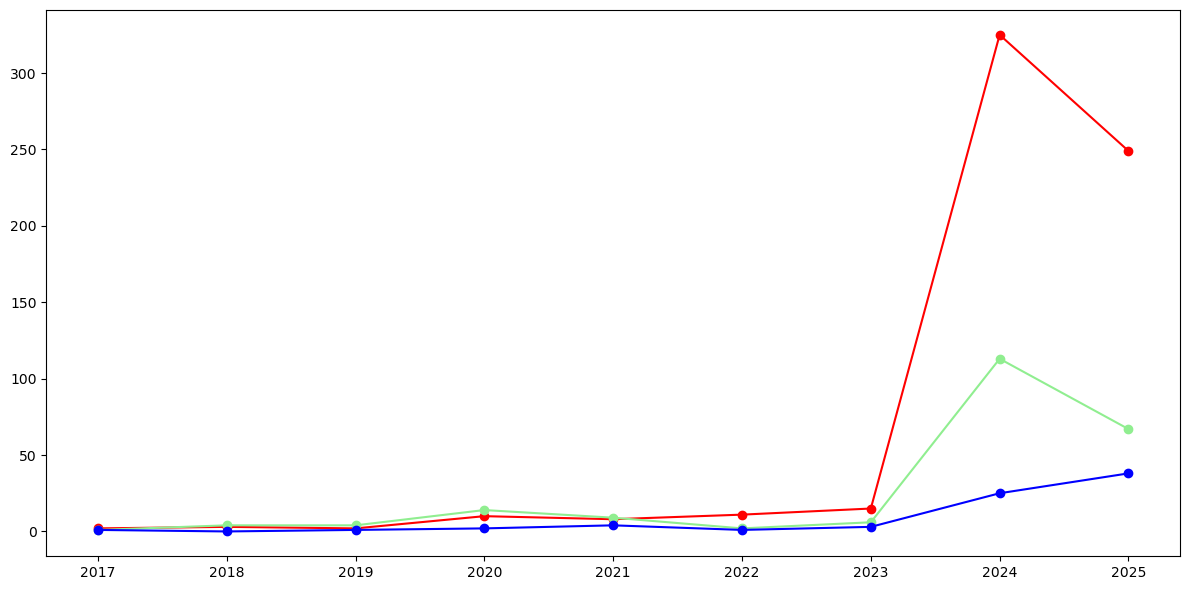

In [7]:
# Create a line graph for timeline vs review number

# Update your DataFrame as usual
df_time = df.copy()

# Mapping for time to approximate year
time_map = {
    "a day ago": "2025", "2 days ago": "2025", "3 days ago": "2025", "4 days ago": "2025", "5 days ago": "2025", "6 days ago": "2025",
    "a week ago": "2025", "2 weeks ago": "2025", "3 weeks ago": "2025", "4 weeks ago": "2025",
    "a month ago": "2025", "2 months ago": "2025", "3 months ago": "2025", "4 months ago": "2025",
    "19 hours ago": "2025", "2 hours ago": "2025",
    "5 months ago": "2024", "6 months ago": "2024", "7 months ago": "2024", "8 months ago": "2024", "9 months ago": "2024",
    "10 months ago": "2024", "11 months ago": "2024", "a year ago": "2024",
    "2 years ago": "2023", "3 years ago": "2022", "4 years ago": "2021", "5 years ago": "2020",
    "6 years ago": "2019", "7 years ago": "2018", "8 years ago": "2017"
}

df_time["Review_Year"] = df_time["Time"].apply(lambda x: time_map.get(str(x).strip().lower(), "Other"))
df_time = df_time[df_time["Review_Year"] != "Other"]  # Remove 'Other'

# Group data by year and sentiment
grouped = df_time.groupby(["Review_Year", "Sentiment"]).size().reset_index(name="Count")
ordered_years = [str(y) for y in range(2017, 2026)]
grouped["Review_Year"] = pd.Categorical(grouped["Review_Year"], categories=ordered_years, ordered=True)
pivot_df = grouped.pivot(index="Review_Year", columns="Sentiment", values="Count").fillna(0)

# Plot line graph
fig, ax = plt.subplots(figsize=(12, 6))
if 'Negative' in pivot_df:
    ax.plot(pivot_df.index, pivot_df["Negative"], marker='o', color='red', label='Negative')
if 'Neutral' in pivot_df:
    ax.plot(pivot_df.index, pivot_df["Neutral"], marker='o', color='lightgreen', label='Neutral')
if 'Positive' in pivot_df:
    ax.plot(pivot_df.index, pivot_df["Positive"], marker='o', color='blue', label='Positive')

fig.tight_layout()

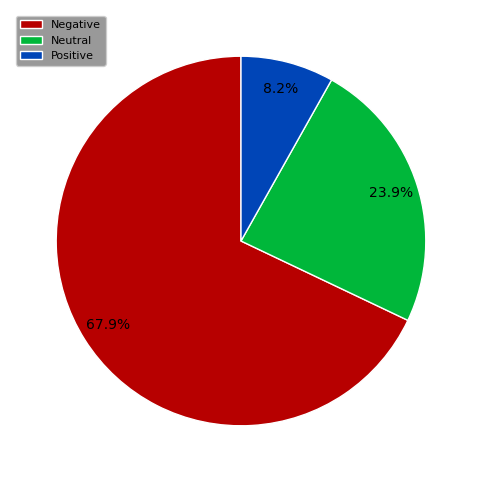

In [8]:
# Create a pie-chart for sentiments column

# Set custom colors for the pie chart
custom_colors = ['#B70000', '#00B73A', '#0045B7']  # Red for Negative, Green for Neutral, Blue for Positive

# Calculate sentiment distribution for the filtered data
sentiment_counts = df['Sentiment'].value_counts()

fig1, ax1 = plt.subplots(figsize=(6, 6))  # You can adjust the figure size here
wedges, texts, autotexts = ax1.pie(sentiment_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=custom_colors, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)  # Move percentage labels outside

# Add a legend to the pie chart
ax1.legend(sentiment_counts.index, loc="upper left", fontsize=8, facecolor='grey')

(-0.5, 599.5, 399.5, -0.5)

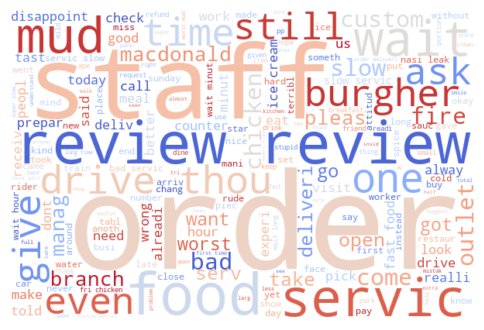

In [9]:
# WordCloud from Cleaned_Reviews

from wordcloud import WordCloud

cloud_text = " ".join(df['Cleaned_Reviews'].astype(str))
wordcloud = WordCloud(width=600, height=400, background_color='#ffffff', colormap='coolwarm').generate(cloud_text)

fig2, ax2 = plt.subplots(figsize=(6, 6))  # Same size for the word cloud
ax2.imshow(wordcloud, interpolation="bilinear")
ax2.axis("off")

In [10]:
# Top 10 Negative Words in Cleaned_Reviews

# Filter negative reviews
negative_reviews = df[df['Sentiment'] == 'Negative']['Cleaned_Reviews']

# Combine all negative review text into one string
negative_text = " ".join(negative_reviews.astype(str)).lower()

# Tokenize and clean
words = re.findall(r'\b\w+\b', negative_text)
common_exclusions = {
    'the', 'and', 'for', 'with', 'this', 'that', 'was', 'are', 'have', 'but', 'not', 'you', 'your', 'wait', 'get', 'mud', 'like', 'thou', 'chicken', 'burgher', 'one', 'give'
    ,'custom', 'even', 'fire', 'ask', 'still', 'worst', 'pleas', 'hour', 'take'
}
filtered_words = [word for word in words if word not in common_exclusions and len(word) > 2]

# Count frequencies
word_counts = Counter(filtered_words)
top_10_words = word_counts.most_common(10)

# Create a list of top 10 most frequent words in negative reviews with their counts
top_10_word_list_cleaned = [{"Word": word, "Frequency": count} for word, count in top_10_words]
top_10_word_list_cleaned


[{'Word': 'order', 'Frequency': 451},
 {'Word': 'servic', 'Frequency': 237},
 {'Word': 'food', 'Frequency': 209},
 {'Word': 'staff', 'Frequency': 200},
 {'Word': 'time', 'Frequency': 142},
 {'Word': 'slow', 'Frequency': 137},
 {'Word': 'bad', 'Frequency': 110},
 {'Word': 'drive', 'Frequency': 103},
 {'Word': 'deliveri', 'Frequency': 70},
 {'Word': 'long', 'Frequency': 61}]

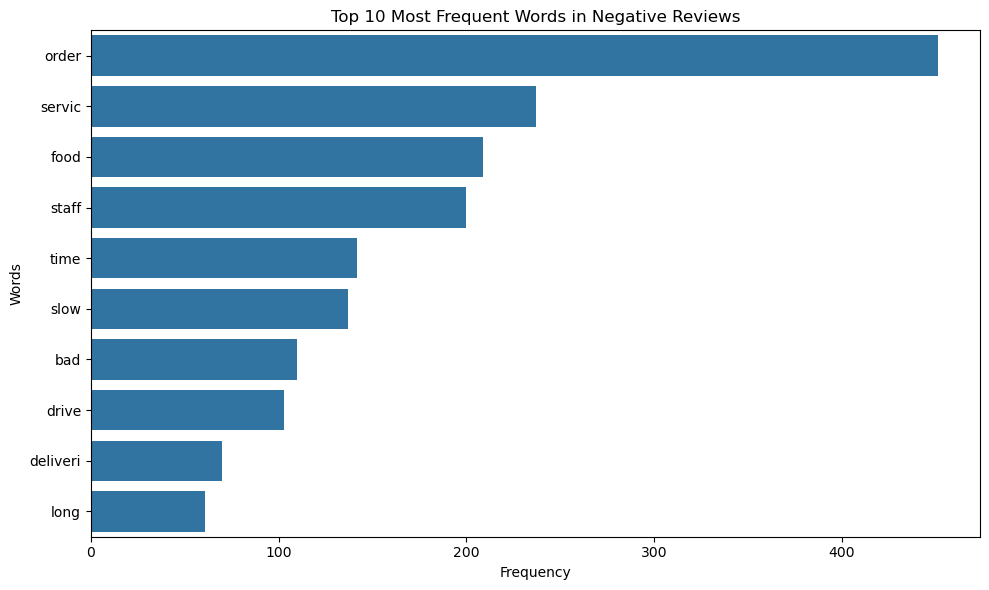

In [11]:
# Prepare data for plotting
words, counts = zip(*top_10_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), hue=None, legend=False)
plt.title("Top 10 Most Frequent Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

In [12]:
# Top 10 Positive Words in Cleaned_Reviews

# Filter positive reviews
positive_reviews = df[df['Sentiment'] == 'Positive']['Cleaned_Reviews']

# Combine all negative review text into one string
positive_text = " ".join(positive_reviews.astype(str)).lower()

# Tokenize and clean
words = re.findall(r'\b\w+\b', positive_text)
common_exclusions = {
    'the', 'and', 'for', 'with', 'this', 'that', 'was', 'are', 'have', 'but', 'not', 'you', 'your', 'wait', 'get', 'mud', 'like', 'thou', 
    'chicken', 'burgher', 'one', 'give', 'custom', 'even', 'fire', 'ask', 'still', 'worst', 'pleas', 'hour', 'take', 'macdonald', 'mcd', 'thank'
}
filtered_words = [word for word in words if word not in common_exclusions and len(word) > 2]

# Count frequencies
word_counts = Counter(filtered_words)
top_10_words = word_counts.most_common(10)

# Create a list of top 10 most frequent words in negative reviews with their counts
top_10_word_list_cleaned = [{"Word": word, "Frequency": count} for word, count in top_10_words]
top_10_word_list_cleaned

[{'Word': 'servic', 'Frequency': 27},
 {'Word': 'good', 'Frequency': 21},
 {'Word': 'staff', 'Frequency': 20},
 {'Word': 'food', 'Frequency': 18},
 {'Word': 'nice', 'Frequency': 13},
 {'Word': 'friend', 'Frequency': 12},
 {'Word': 'order', 'Frequency': 12},
 {'Word': 'fast', 'Frequency': 9},
 {'Word': 'great', 'Frequency': 9},
 {'Word': 'best', 'Frequency': 7}]

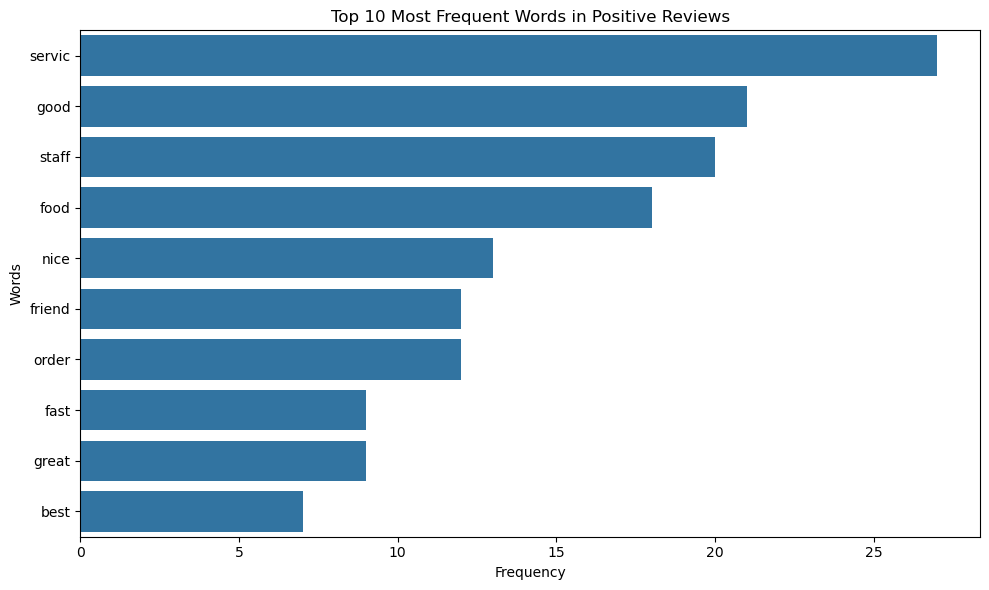

In [13]:
# Prepare data for plotting
words, counts = zip(*top_10_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), hue=None, legend=False)
plt.title("Top 10 Most Frequent Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

In [14]:
# Topic Modelling for Cleaned_Reviews

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize the cleaned reviews into words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Processed_Reviews'])

# Fit the LDA model
n_topics = 4  # Number of topics (you can adjust based on your analysis)
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Get top words for each topic
def get_top_words(model, vectorizer, n_words=5):
    feature_names = vectorizer.get_feature_names_out()
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_idx = topic.argsort()[-n_words:][::-1]
        top_words[topic_idx] = [(feature_names[i], topic[i]) for i in top_idx]
    return top_words

top_words = get_top_words(lda, vectorizer)

# Display the top words for each topic in the required format
print("Top Terms for Each Topic:")
for topic_idx in range(n_topics):
    print(f"Topic {topic_idx}:")
    for word, weight in top_words[topic_idx]:
        print(f" - \"{word}\" (weight: {weight:.3f})")
    print()


Top Terms for Each Topic:
Topic 0:
 - "order" (weight: 22.634)
 - "servic" (weight: 21.331)
 - "burgher" (weight: 15.698)
 - "mud" (weight: 15.593)
 - "open" (weight: 15.119)

Topic 1:
 - "order" (weight: 59.279)
 - "staff" (weight: 38.793)
 - "food" (weight: 30.038)
 - "like" (weight: 25.913)
 - "mud" (weight: 21.165)

Topic 2:
 - "order" (weight: 375.539)
 - "servic" (weight: 222.843)
 - "wait" (weight: 209.881)
 - "food" (weight: 187.236)
 - "staff" (weight: 178.104)

Topic 3:
 - "review" (weight: 214.247)
 - "servic" (weight: 13.957)
 - "rider" (weight: 10.228)
 - "kind" (weight: 9.237)
 - "bad" (weight: 9.132)



In [15]:
# Sentiment Analysis

# TextBlob function
def get_tb_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return pd.Series([polarity, sentiment], index=["TextBlob Polarity", "TextBlob Sentiment"])

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# VADER function
def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound > 0:
        sentiment = "Positive"
    elif compound < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return pd.Series([compound, sentiment], index=["VADER Compound", "VADER Sentiment"])

# Apply both to the same dataframe
df[['TextBlob Polarity', 'TextBlob Sentiment']] = df['Processed_Reviews'].apply(get_tb_sentiment)
df[['VADER Compound', 'VADER Sentiment']] = df['Processed_Reviews'].apply(get_vader_sentiment)


In [16]:
data = df[['Cleaned_Reviews', 'Sentiment', 'TextBlob Polarity', 'TextBlob Sentiment', 'VADER Compound', 'VADER Sentiment']]
data.head(20)

,Cleaned_Reviews,Sentiment,TextBlob Polarity,TextBlob Sentiment,VADER Compound,VADER Sentiment
0,worst macdonald give visit life food cold hard...,Negative,-0.272262,Negative,-0.8957,Negative
1,worst servic ever request chicken part said ch...,Negative,-0.300000,Negative,-0.8779,Negative
2,alway alway pleasant locat enjoy train go copi...,Positive,0.294444,Positive,0.7579,Positive
3,done risk order pay cash employe present see l...,Negative,0.250000,Positive,0.1027,Positive
4,pleas train cafe staff order ice blend much fo...,Negative,-0.266667,Negative,-0.2500,Negative
5,wife unlik sign,Negative,0.000000,Neutral,0.0000,Neutral
6,cashier kati friend greet smile,Positive,0.300000,Positive,0.7906,Positive
7,understand simpl instruct deliveri alway somet...,Negative,0.000000,Neutral,-0.1531,Negative
8,hygien issu drink dirti object,Negative,0.000000,Neutral,0.0000,Neutral
9,staff nice,Negative,0.600000,Positive,0.4215,Positive


In [17]:
# Classification Report for TextBlob
print("\nClassification Report for TextBlob:")
print(classification_report(
    df['Sentiment'],
    df['TextBlob Sentiment'],
    target_names=['Negative', 'Neutral', 'Positive']
))

# Classification Report for VADER
print("\nClassification Report for VADER:")
print(classification_report(
    df['Sentiment'],
    df['VADER Sentiment'],
    target_names=['Negative', 'Neutral', 'Positive']
))


Classification Report for TextBlob:
              precision    recall  f1-score   support

    Negative       0.99      0.58      0.73       625
     Neutral       0.60      0.97      0.75       220
    Positive       0.30      0.83      0.44        75

    accuracy                           0.69       920
   macro avg       0.63      0.79      0.64       920
weighted avg       0.84      0.69      0.71       920


Classification Report for VADER:
              precision    recall  f1-score   support

    Negative       0.99      0.52      0.68       625
     Neutral       0.58      0.97      0.73       220
    Positive       0.27      0.80      0.40        75

    accuracy                           0.65       920
   macro avg       0.61      0.76      0.60       920
weighted avg       0.83      0.65      0.67       920



In [18]:
# Machine Learning Based Approach

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [19]:
df.head()

,Branch,Customer,Time,Reviews,Cleaned_Reviews,Processed_Reviews,Sentiment,TextBlob Polarity,TextBlob Sentiment,VADER Compound,VADER Sentiment
0,McDonald’s Petronas Kota Damansara DT,Hamd,3 weeks ago,Worst McDonalds Ive visited in my life.\n\nFoo...,worst macdonald give visit life food cold hard...,"['worst', 'macdonald', 'give', 'visit', 'life'...",Negative,-0.272262,Negative,-0.8957,Negative
1,McDonald’s Petronas Kota Damansara DT,Megan Ooi,3 months ago,"worst service ever, when requested for chicken...",worst servic ever request chicken part said ch...,"['worst', 'servic', 'ever', 'request', 'chicke...",Negative,-0.300000,Negative,-0.8779,Negative
2,McDonald’s Petronas Kota Damansara DT,VincentKoh LUMCFan,5 months ago,[2022-2024]\n\nAlways ALWAYS a pleasant locati...,alway alway pleasant locat enjoy train go copi...,"['alway', 'alway', 'pleasant', 'locat', 'enjoy...",Positive,0.294444,Positive,0.7579,Positive
3,McDonald’s Petronas Kota Damansara DT,Pang Choon Fuei,4 months ago,I done the kiosk order and pay Cash.\n\nBut em...,done risk order pay cash employe present see l...,"['done', 'risk', 'order', 'pay', 'cash', 'empl...",Negative,0.250000,Positive,0.1027,Positive
4,McDonald’s Petronas Kota Damansara DT,nur aein,3 months ago,"Please train your mc cafe staff, order ice ble...",pleas train cafe staff order ice blend much fo...,"['plea', 'train', 'cafe', 'staff', 'order', 'i...",Negative,-0.266667,Negative,-0.2500,Negative


In [20]:
# Count each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Calculate percentage
sentiment_percentages = df['Sentiment'].value_counts(normalize=True) * 100

# Combine into one DataFrame
sentiment_summary = pd.DataFrame({
    'Count': sentiment_counts,
    'Percentage (%)': sentiment_percentages.round(2)
})

# Display the table
print(sentiment_summary)

           Count  Percentage (%)
Sentiment                       
Negative     625           67.93
Neutral      220           23.91
Positive      75            8.15


In [21]:
# Encode sentiment labels
label_encoder = LabelEncoder()
df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])

In [22]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Reviews'].astype(str))
y = df['Sentiment_Label']

Classification Report - Naive Bayes: 

              precision  recall  f1-score  support
Negative           0.88    1.00      0.94   126.00
Neutral            1.00    0.93      0.96    44.00
Positive           0.00    0.00      0.00    14.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.63    0.64      0.63   184.00
weighted avg       0.84    0.91      0.87   184.00


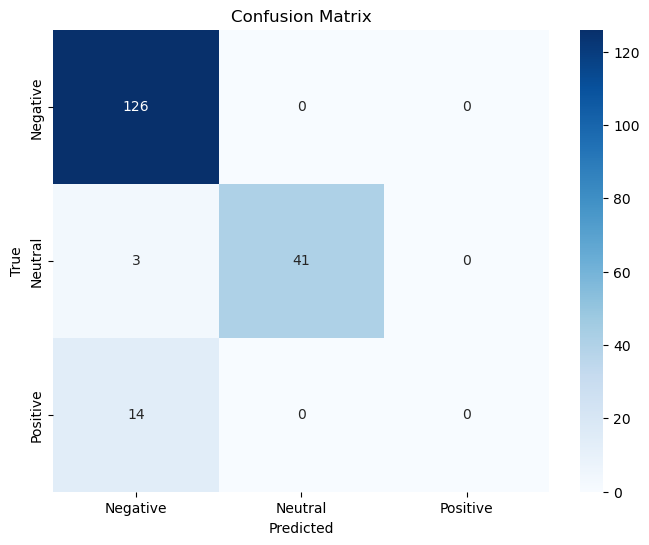


Classification Report - SVM:

              precision  recall  f1-score  support
Negative           0.89    1.00      0.94   126.00
Neutral            1.00    0.93      0.96    44.00
Positive           1.00    0.14      0.25    14.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.96    0.69      0.72   184.00
weighted avg       0.93    0.92      0.90   184.00


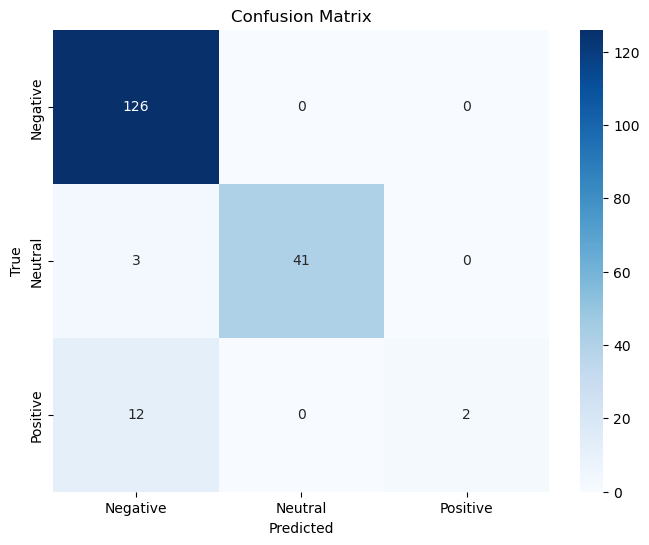

In [23]:
# WITHOUT SMOTE (Unbalance Data)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models
## Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

## SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation
## NB Report
nb_report = classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_, output_dict=True, zero_division=0)
nb_df = pd.DataFrame(nb_report).transpose().round(2)

## SVM Report
svm_report = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_, output_dict=True, zero_division=0)
svm_df = pd.DataFrame(svm_report).transpose().round(2)

# Classification Report + Confusion Matrix
## NB Report
print("Classification Report - Naive Bayes: \n")
print(nb_df.to_string())

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## SVM Report
print("\nClassification Report - SVM:\n")
print(svm_df.to_string())

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Classification Report - Naive Bayes with SMOTE: 

              precision  recall  f1-score  support
Negative           0.96    0.95      0.96   126.00
Neutral            0.98    0.93      0.95    44.00
Positive           0.65    0.79      0.71    14.00
accuracy           0.93    0.93      0.93     0.93
macro avg          0.86    0.89      0.87   184.00
weighted avg       0.94    0.93      0.94   184.00


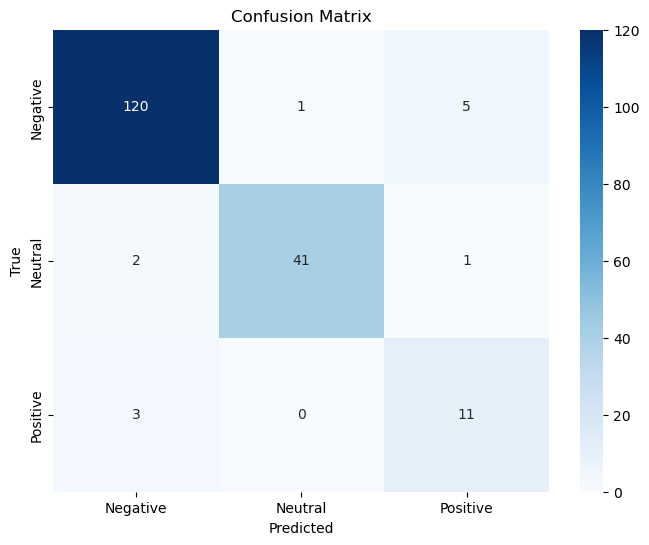


Classification Report - SVM with SMOTE:

              precision  recall  f1-score  support
Negative           0.91    1.00      0.95   126.00
Neutral            1.00    0.93      0.96    44.00
Positive           1.00    0.29      0.44    14.00
accuracy           0.93    0.93      0.93     0.93
macro avg          0.97    0.74      0.79   184.00
weighted avg       0.94    0.93      0.92   184.00


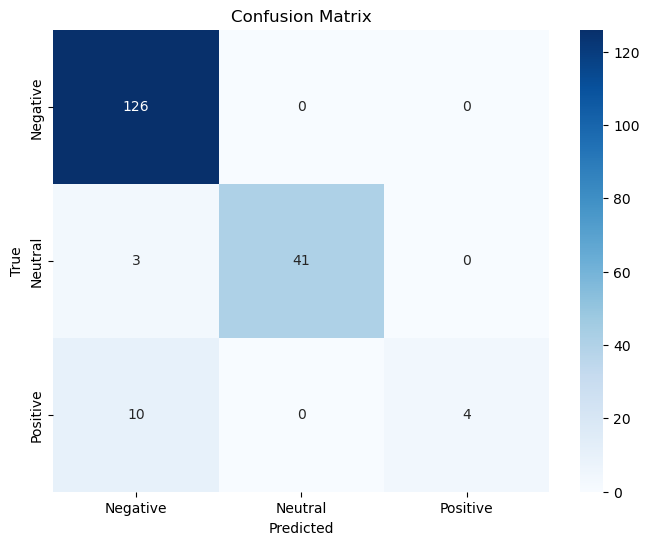

In [24]:
# WITH SMOTE (Balancing Data)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for Balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Models
## Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_balanced, y_train_balanced)
y_pred_nb = nb_model.predict(X_test)

## SVM
svm_model = SVC()
svm_model.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm_model.predict(X_test)

# Evaluation
## NB Report
nb_report = classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_, output_dict=True)
nb_df = pd.DataFrame(nb_report).transpose().round(2)

## SVM Report
svm_report = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_, output_dict=True)
svm_df = pd.DataFrame(svm_report).transpose().round(2)

# Classification Report + Confusion Matrix
## NB Report
print("Classification Report - Naive Bayes with SMOTE: \n")
print(nb_df.to_string())

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## SVM Report
print("\nClassification Report - SVM with SMOTE:\n")
print(svm_df.to_string())

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()